In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('data.csv')

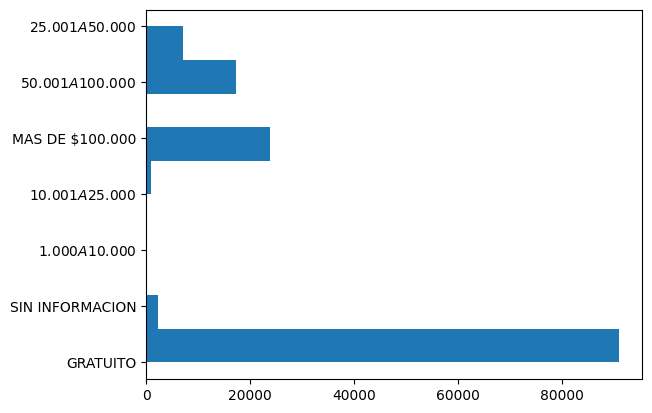

In [11]:
import seaborn as sns
plt.hist(data=df, x='PAGO_MENSUAL2023',orientation='horizontal')
plt.show()

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
columns_to_label_encode = ['NOMBRE_UNIDAD_EDUC', 'NOMBRE_COMUNA_EGRESO',
                            'PAGO_MATRICULA2020', 'PAGO_MENSUAL2020', 'PAGO_MATRICULA2021', 'PAGO_MENSUAL2021',
                            'PAGO_MATRICULA2022', 'PAGO_MENSUAL2022', 'PAGO_MATRICULA2023', 'PAGO_MENSUAL2023']

label_encoder = LabelEncoder()
for column in columns_to_label_encode:
    df.loc[:, column] = label_encoder.fit_transform(df.loc[:, column])


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


data = df_normalized.drop(['MRUN', 'CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL', 'PROMEDIO_CM_MAX', ], axis=1).values
columns = df_normalized.drop(['MRUN', 'CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL', 'PROMEDIO_CM_MAX', ], axis=1).columns
target = df_normalized['PROMEDIO_CM_MAX'].values
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [5]:
mlp = MLPRegressor()

parameters = {
    'hidden_layer_sizes': [(32,32,32), (32,32), (64,64), (64,64,64), (128,128), (128,128,128), (32,64,128)],
    'activation': ['identity', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [16, 32, 64],
    'max_iter': [50, 100],
    'early_stopping': [True, False]
}

grid_search = GridSearchCV(mlp, parameters, cv=2,verbose=2)
grid_search.fit(X_train[:5000], y_train[:5000])

Fitting 2 folds for each of 3024 candidates, totalling 6048 fits


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   6.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.3s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  10.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  10.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.3s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   6.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.0s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidd

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidde

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 3

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 6

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidde

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.6s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.0s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.2s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.0s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   7.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.0s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.8s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  10.4s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stop

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.7s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.0001, batch_size=16, early_stopping=False

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.8s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.1s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.2s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   6.6s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.1s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.3s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.3s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.2s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.8s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidd

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidde

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 3

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 6

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidde

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.7s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.3s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.2s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_si

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.4s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.1s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.5s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.1s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stoppi

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=identity, alpha=0.0001, batch_size=32, early_stopping=False, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.7s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidd

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidde

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 6

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidde

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_si

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.3s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.0s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stoppi

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, h

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=identity, alpha=0.0001, batch_size=64, early_stopping=False, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   6.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.2s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.4s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  10.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  10.5s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   4.1s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   3.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.4s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.4s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_l

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64),

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   4.5s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.6s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.2s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.5s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_l

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   7.1s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.1s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   6.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  10.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  10.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   6.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.1s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  10.8s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  10.9s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.3s
[CV] END activation=identity, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_lay

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_la

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), le

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), le

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_laye

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.2s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   9.7s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   8.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   9.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   9.8s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=32, early_stopping=False, hidden

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_lay

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_laye

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), le

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_laye

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(1

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.0s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=Fal

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=identity, alpha=0.001, batch_size=64, early_stopping=False, hidden

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.3s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   6.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   6.7s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.3s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.5s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.7s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.7s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.7s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_l

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.3s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.6s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   3.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   3.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.2s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.7s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.3s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.1s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.3s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.0s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  11.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  11.5s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   7.8s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  11.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  11.6s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.7s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.3s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.6s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.3s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=identity, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.9s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.9s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.9s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.9s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.3s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   9.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   9.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.8s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   9.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   9.7s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=identity, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.6s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.6s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.3s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.4s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   6.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  12.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  12.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   6.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   6.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  12.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  12.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=con

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adapti

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64,

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learni

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   6.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  14.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   6.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   9.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32,

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adap

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adapti

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 6

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 3

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=cons

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 1

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_laye

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.7s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.7s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.7s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.7s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   6.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   6.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  12.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   6.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  12.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  12.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.3s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), lea

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant,

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   4.1s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=const

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   4.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   5.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.1s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.5s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), l

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   9.1s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.1s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.3s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learni

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.2s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   9.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  11.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.8s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  10.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  12.9s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_size

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.2s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.2s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.0s
[CV] END activation=tanh, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.7s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.7s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.1s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   9.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   9.3s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.5s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.3s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.3s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant,

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=const

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.2s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.4s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.9s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.2s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learni

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  11.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  11.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.2s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  11.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  11.2s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.8s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.8s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, ma

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), lear

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learni

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_size

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 12

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.1s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   6.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   6.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.5s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  12.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  11.9s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.5s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  12.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  12.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.9s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   4.4s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.5s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.2s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   6.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   6.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  13.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  13.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   9.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   8.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.5s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  13.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  12.9s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  10.0s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.8s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.3s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.6s
[CV] END activation=tanh, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.1s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   9.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   9.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.1s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.1s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, m

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   8.9s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  11.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.4s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  11.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  10.2s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.7s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.7s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.7s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.3s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.8s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.7s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.4s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  11.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  11.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  11.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.9s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=con

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.4s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   5.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   6.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   9.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   9.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.1s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.1s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   9.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   9.5s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.4s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  14.8s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  14.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.4s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  10.3s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  14.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  14.8s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.8s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.7s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.9s
[CV] END activation=relu, alpha=0.0001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=con

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.5s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.5s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.4s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  10.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  10.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.9s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  10.5s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  10.6s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.5s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=cons

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=con

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.0s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.6s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.4s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_laye

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.1s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.9s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.0s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  11.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.2s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  11.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  11.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), lea

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant,

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   3.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=const

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   4.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), l

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   6.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.2s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learni

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   7.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   8.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.3s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.7s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  14.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   9.0s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_size

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.0s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.001, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant,

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), l

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learni

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.2s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=  10.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   8.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.3s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.0s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  10.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=  10.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.0s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), lea

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant,

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, 

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=const

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), l

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.7s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.8s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.0s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.5s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.5s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.4s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   3.8s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.4s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   7.2s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   8.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   5.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  11.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  11.4s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   9.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   5.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  11.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  11.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.2s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.5s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learni

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.8s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_i

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_it

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   4.8s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.8s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   3.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   5.4s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   6.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   6.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   7.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  12.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=  12.4s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   6.3s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   7.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  12.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  12.5s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.4s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.01, batch_size=16, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   4.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   4.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   8.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   9.0s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.0s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   4.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   8.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   9.0s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   2.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_i

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, m

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learnin

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.3s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.8s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   4.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   3.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   6.3s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rat

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   5.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   9.6s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   7.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   4.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   5.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.9s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   7.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   7.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   8.4s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32,

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.01, batch_size=32, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   2.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   5.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   2.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=True, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=sgd; total time=   0.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=50, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=constant, max_iter=100, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 32), learning_rate=adaptive, max_iter=100, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_i

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.0s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, m

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=constant, max_iter=100, solver=adam; total time=   1.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   0.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learnin

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   3.5s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.7s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   3.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=sgd; total time=   1.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   1.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.3s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   6.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   2.8s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   4.7s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   5.2s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   4.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   5.8s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32,

c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time=   0.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time=   1.6s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time=   1.2s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.01, batch_size=64, early_stopping=False, hidden_layer_sizes=(32, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time=   2.6s
Testing Mean Squared Error: 0.014146263002384182
Testing Mean Absolute Error: 0.09458558083800409
Test R-squ

In [8]:
best_params = (grid_search.best_params_)

mlp_best = MLPRegressor(**best_params)
mlp_best.fit(X_train, y_train)
predictions = mlp_best.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Testing Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, predictions)
print(f'Testing Mean Absolute Error: {mae}')
r2 = r2_score(y_test, predictions)
print(f'Test R-squared: {r2}')
print(best_params)

Testing Mean Squared Error: 0.013505809283340001
Testing Mean Absolute Error: 0.09283235410187976
Test R-squared: 0.46827563565437114
{'activation': 'tanh', 'alpha': 0.001, 'batch_size': 32, 'early_stopping': False, 'hidden_layer_sizes': (32, 64, 128), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}


                 feature    importance
7               PTJE_NEM  9.727241e-01
5         ANYO_DE_EGRESO  2.443055e-01
9           PTJE_RANKING  1.257372e-01
3            DEPENDENCIA  8.305036e-02
17              EDAD_ALU  8.037828e-02
0               COD_SEXO  4.642619e-02
6         PROMEDIO_NOTAS  3.499244e-02
8         PORC_SUP_NOTAS  3.467027e-02
30    PAGO_MATRICULA2023  8.076307e-03
31      PAGO_MENSUAL2023  4.582517e-03
2     NOMBRE_UNIDAD_EDUC  3.683627e-03
1                    RBD  3.055654e-03
32                 RURAL  2.378465e-03
29      PAGO_MENSUAL2022  2.007443e-03
4   NOMBRE_COMUNA_EGRESO  1.874845e-03
25      PAGO_MENSUAL2020  1.318681e-03
27      PAGO_MENSUAL2021  9.626319e-04
24    PAGO_MATRICULA2020  4.125754e-04
10         PROM_GRAL2020  4.045120e-04
12         PROM_GRAL2021  2.506603e-04
28    PAGO_MATRICULA2022  2.496336e-04
14         PROM_GRAL2022  2.349937e-04
15        ASISTENCIA2022  1.755920e-04
26    PAGO_MATRICULA2021  6.853693e-05
13        ASISTENCIA2021 

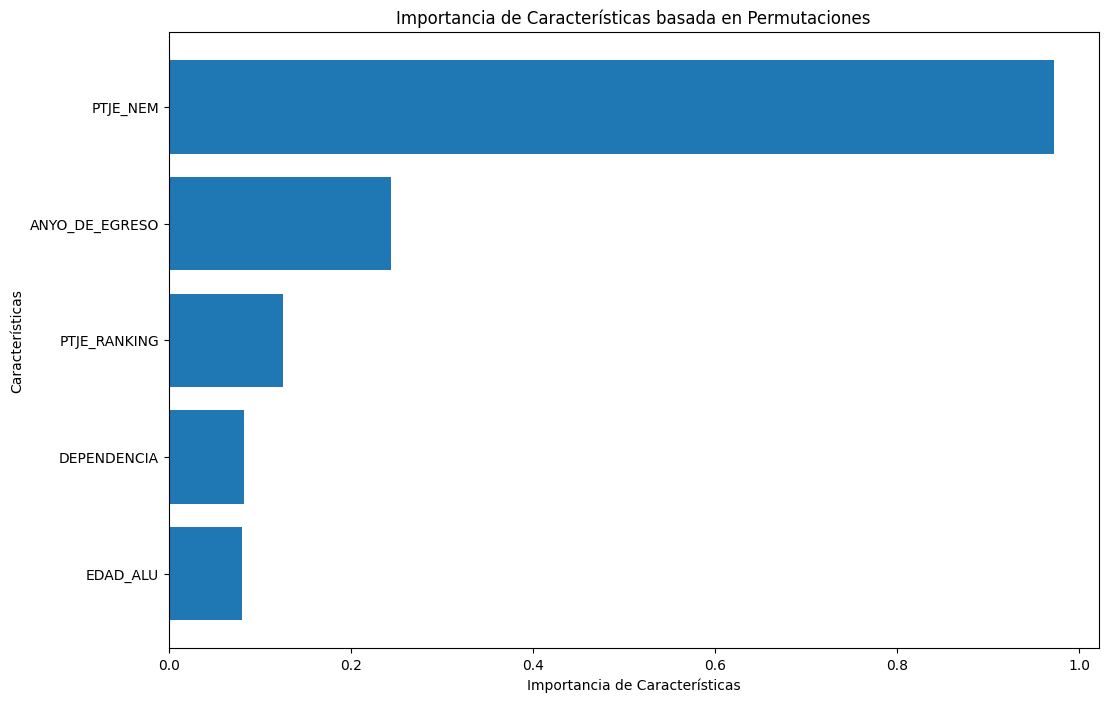

In [13]:
from sklearn.inspection import permutation_importance
# Calcular la importancia de las características
results = permutation_importance(mlp_best, X_test, y_test, n_repeats=10, random_state=0)

# Obtener la media de la disminución en el score de las predicciones para cada característica
importances = results.importances_mean

# Crear un DataFrame para visualizar mejor la importancia de cada característica
feature_importances = pd.DataFrame({'feature': columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Mostrar las características más importantes
print(feature_importances)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'][:5], feature_importances['importance'][:5])
plt.xlabel('Importancia de Características')
plt.ylabel('Características')
plt.title('Importancia de Características basada en Permutaciones')
plt.gca().invert_yaxis()
plt.show()

In [17]:
len(mlp_best.loss_curve_)

23